In [172]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from datetime import datetime

import streamlit as st
from PIL import Image
import os

In [118]:
np_path_XYs = np.genfromtxt(r"/content/isolated.csv",delimiter = ',')
np_path_XY2s = np.genfromtxt(r"/content/isolated_sol.csv",delimiter = ',')

In [119]:
size = len(np.unique(np_path_XYs[:,0]))
size

3

In [120]:
size2 = len(np.unique(np_path_XY2s[:,0]))
size2

3

In [121]:
np_path_XYs[:,0] == 0
np_XYs = np_path_XYs[np_path_XYs[:,0] == 0][:,1:]
np.unique(np_XYs[:,0])
XY =[]
XY2 =[]

In [122]:
for i in range(size):
    new_path = np_path_XYs[np_path_XYs[:,0] == i][:,2:]
    XY.append(new_path)
for i in range(size2):
    new_path = np_path_XY2s[np_path_XY2s[:,0] == i][:,2:]
    XY2.append(new_path)

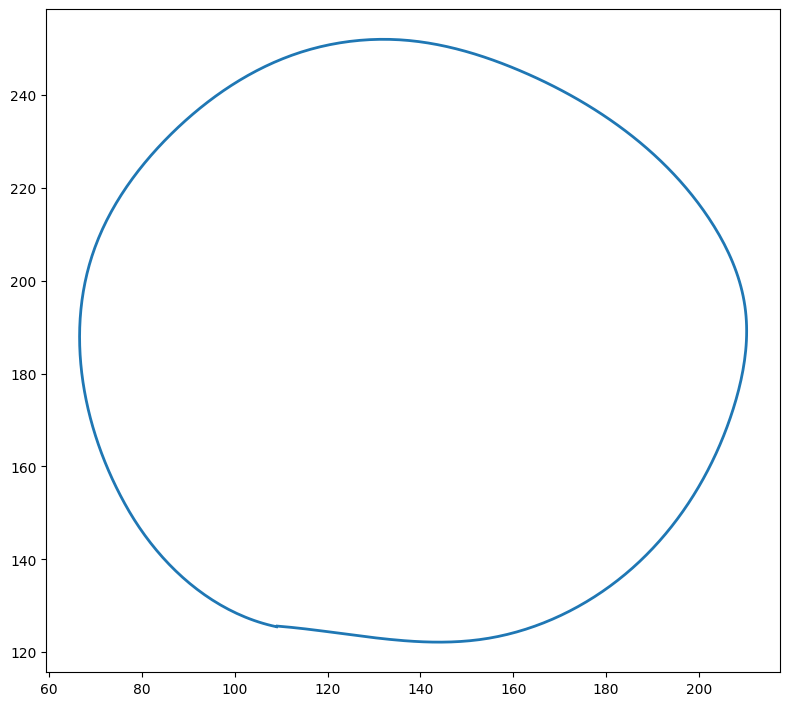

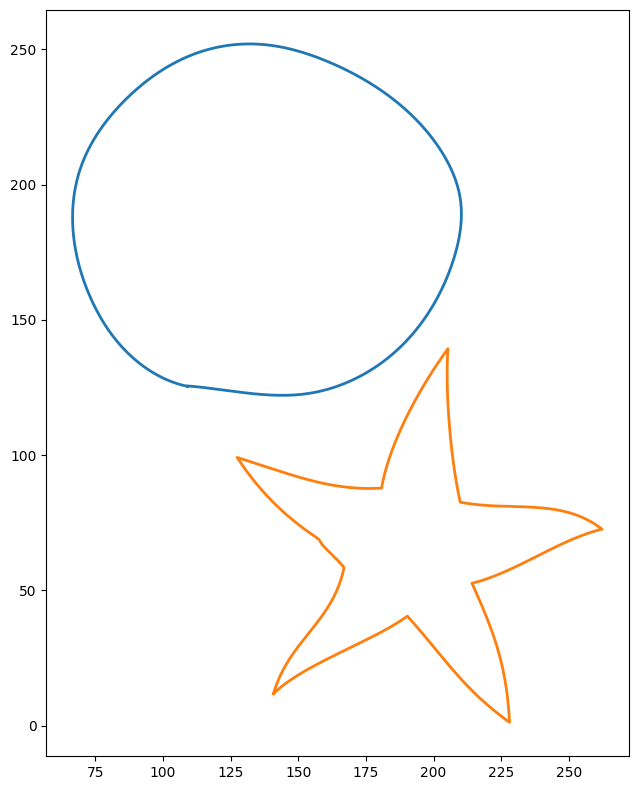

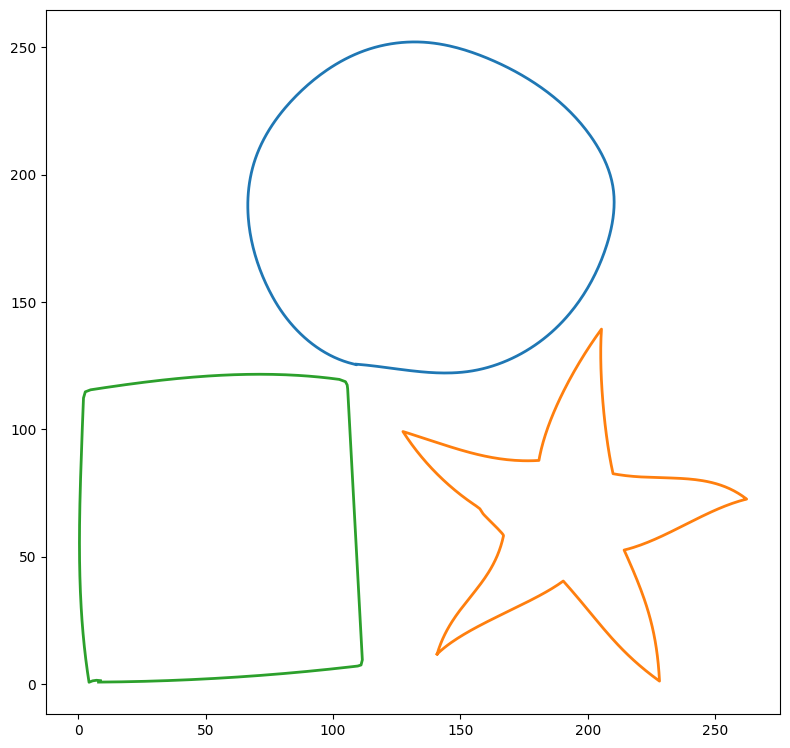

In [123]:
for i in range(size):
    fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
    for j in range(i+1):
        ax.plot (XY[j][:, 0], XY[j][:, 1], linewidth =2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

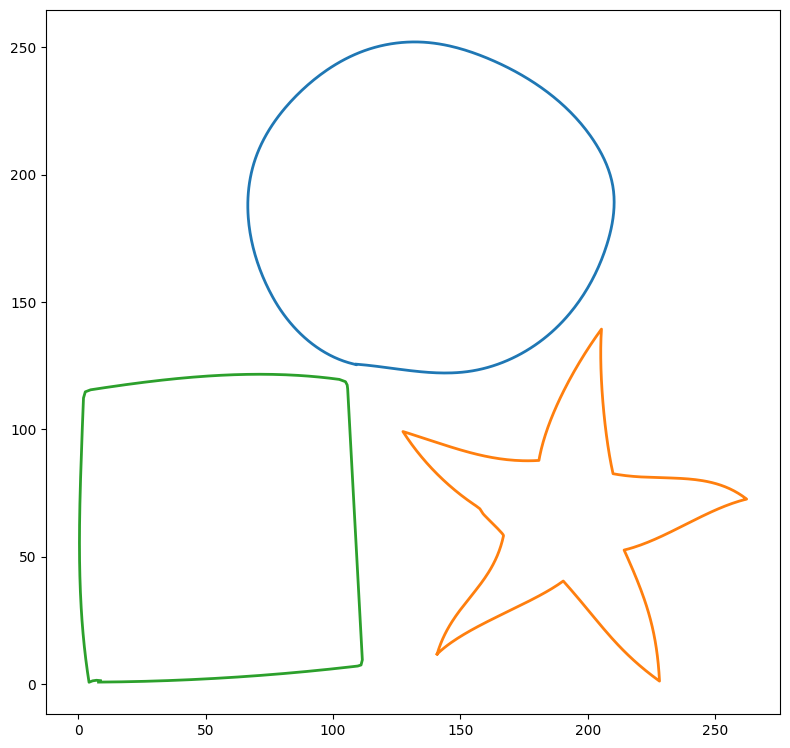

In [124]:
fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
for i in range(size):
    ax.plot (XY[i][:, 0], XY[i][:, 1], linewidth =2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

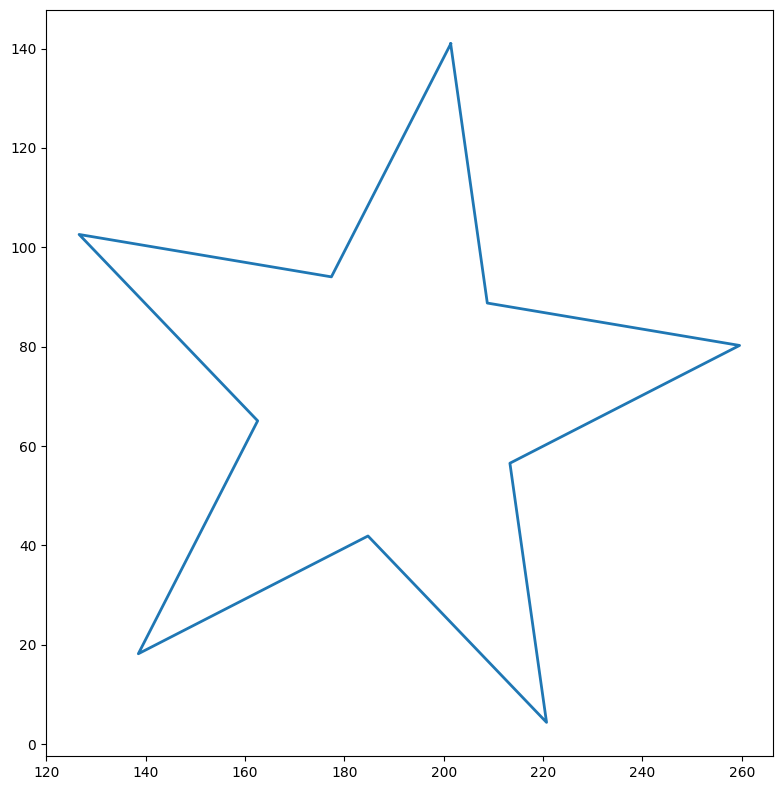

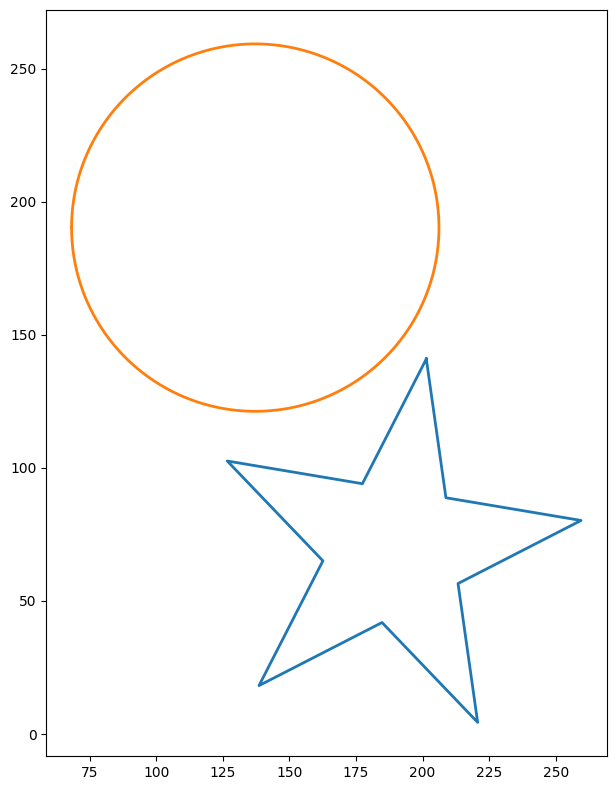

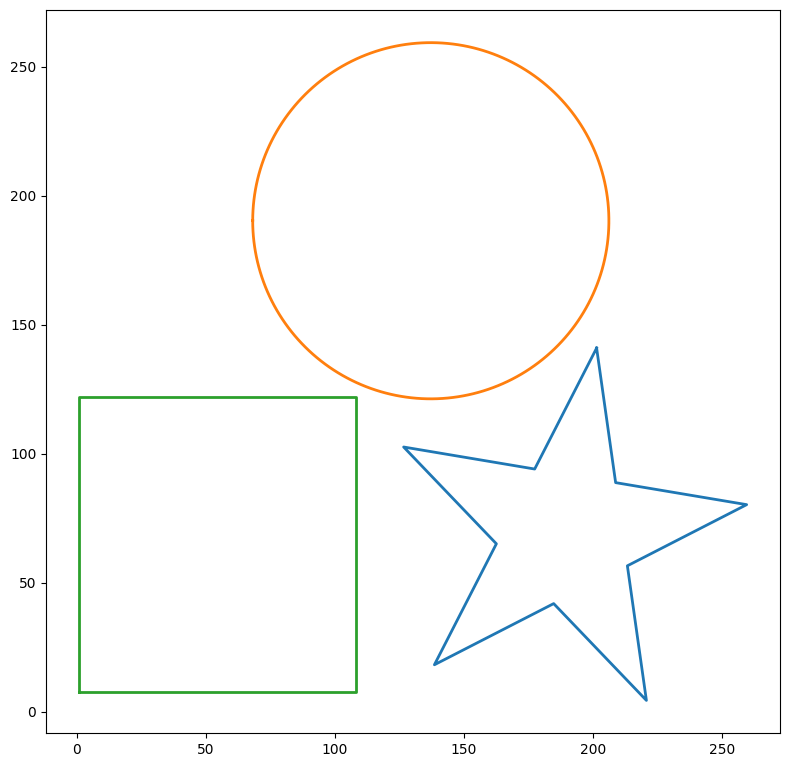

In [125]:
for i in range(size2):
    fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
    for j in range(i+1):
        ax.plot (XY2[j][:, 0], XY2[j][:, 1], linewidth =2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

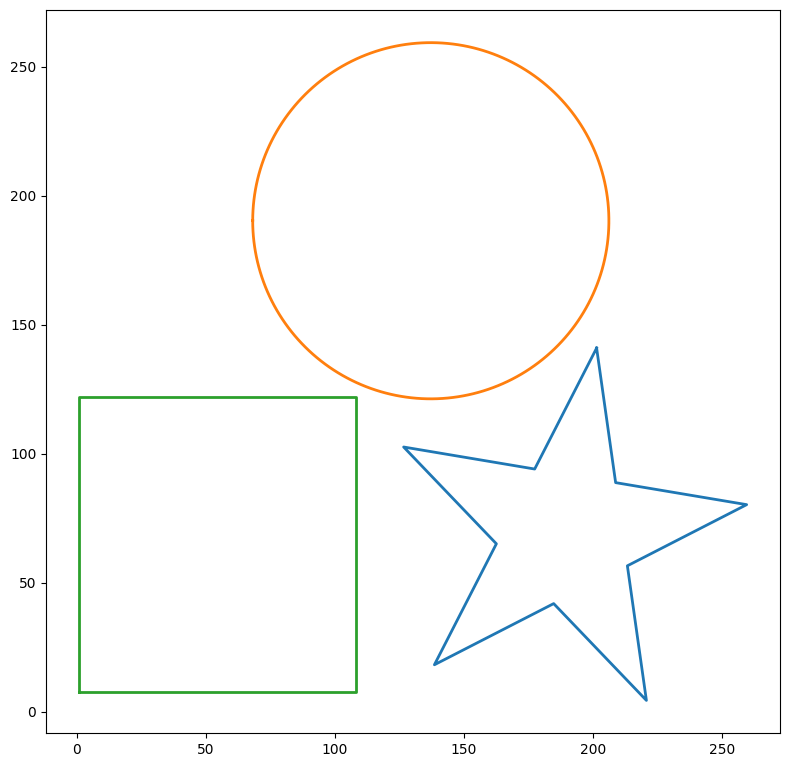

In [126]:
fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
for i in range(size2):
    ax.plot (XY2[i][:, 0], XY2[i][:, 1], linewidth =2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [127]:
len(XY)
XY[0][0]
XY[0][len(XY[0])-1]
len(XY[0])

419

In [128]:
start_points = []
end_points = []

for i in range(size):
    a = XY[i][0]
    b = XY[i][len(XY[i])-1]
    start_points.append(a);
    end_points.append(b);
curve_num = {}
for i in range(2*size):
    curve_num[i] = i//2
partner = {}
for i in range(0,2*size,2):
    partner[i] = i+1
for i in range(1,2*size,2):
    partner[i] = i-1
umap = {}
for i in range(size):
    umap[2*i] = start_points[i]
    umap[2*i +1] = end_points[i]

In [129]:
partner = {}
for i in range(0,2*size,2):
    partner[i] = i+1
for i in range(1,2*size,2):
    partner[i] = i-1
umap = {}
for i in range(size):
    umap[2*i] = start_points[i]
    umap[2*i +1] = end_points[i]

In [130]:
num_curves = size

In [131]:
num_curves = size

adjacency_list = [[] for _ in range(2 * num_curves)]

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)
for i in range(num_curves):
    adjacency_list[2 * i].append((2 * i + 1, i))
    adjacency_list[2 * i + 1].append((2 * i, i))

    for j in range(num_curves):
        if i != j:
            if euclidean_distance(start_points[i], start_points[j]) < 5:
                adjacency_list[2 * i].append((2 * j, j))
            if euclidean_distance(start_points[i], end_points[j]) < 5:
                adjacency_list[2 * i].append((2 * j + 1, j))
            if euclidean_distance(end_points[i], start_points[j]) < 5:
                adjacency_list[2 * i + 1].append((2 * j, j))
            if euclidean_distance(end_points[i], end_points[j]) < 5:
                adjacency_list[2 * i + 1].append((2 * j + 1, j))

In [132]:
def dfs(node, start_node, visited, path, adj_list, partner, unique_cycles):
    path.append(node)
    visited.add(node)

    for neighbor, curve_number in adj_list[node]:

        if len(path) ==2 and partner[path[0]] == path[1] and euclidean_distance(umap[path[0]], umap[path[1]]) < 5:
            curve_path =[]
            curve_path.append(curve_num[path[0]])
            cycle_representation = frozenset(curve_path)
            if cycle_representation not in unique_cycles and len(cycle_representation) > 0:
                unique_cycles[cycle_representation] = list(path) + [start_node]

        if neighbor == start_node and len(path) > 2:
            curve_path = []
            for i in range(len(path)-1):
                cur_node = path[i]
                next_node = path[i + 1]
                if partner[cur_node] == next_node:
                    curve_path.append(curve_num[cur_node])
            if partner[path[len(path)-1]] == neighbor:
                    curve_path.append(curve_num[neighbor])

            cycle_representation = frozenset(curve_path)
            if cycle_representation not in unique_cycles and len(cycle_representation) > 0:
                unique_cycles[cycle_representation] = list(path) + [start_node]
        elif neighbor not in visited:
            dfs(neighbor, start_node, visited, path, adj_list, partner, unique_cycles)

    path.pop()
    visited.remove(node)

def find_closed_curves(adj_list, num_nodes):
    unique_cycles = {}

    for start_node in range(num_nodes):

        visited = set()
        dfs(start_node, start_node, visited, [], adj_list, partner, unique_cycles)

    return unique_cycles

num_nodes = len(adjacency_list)

closed_curves = find_closed_curves(adjacency_list, num_nodes)
closed_curves

{frozenset({0}): [0, 1, 0],
 frozenset({1}): [2, 3, 2],
 frozenset({2}): [4, 5, 4]}

In [133]:
type(closed_curves)

dict

In [134]:
len(closed_curves)

3

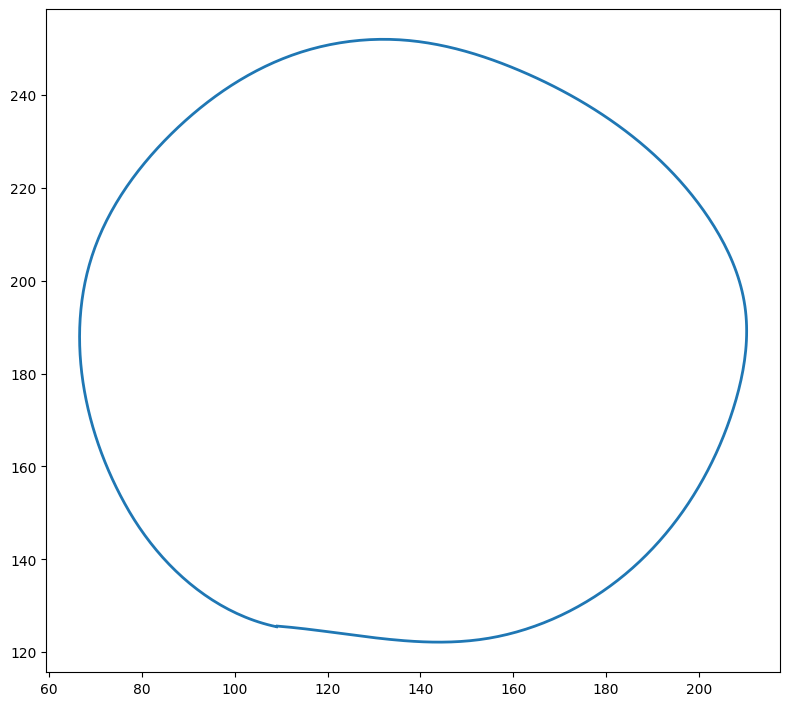

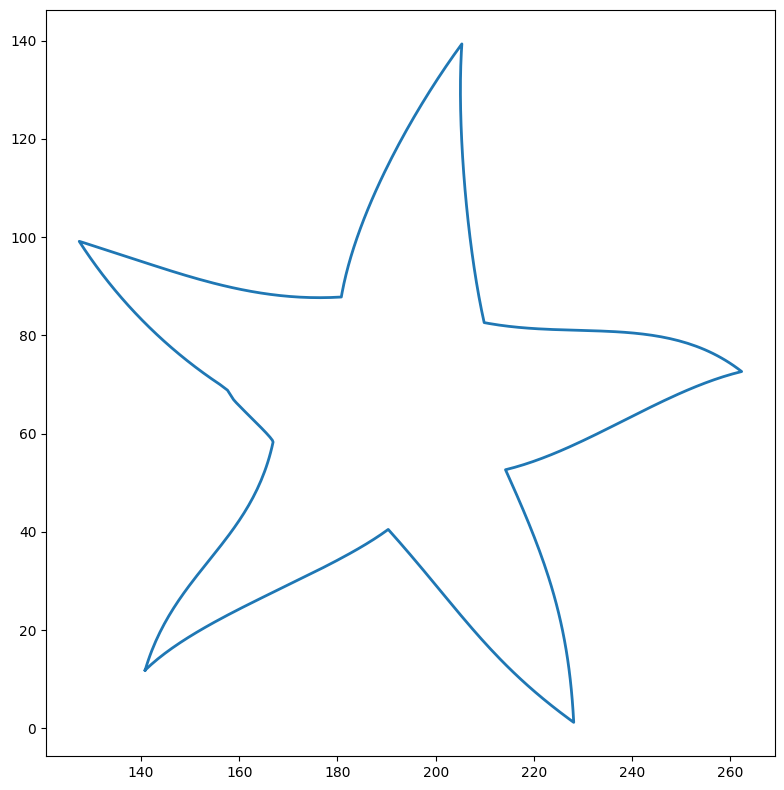

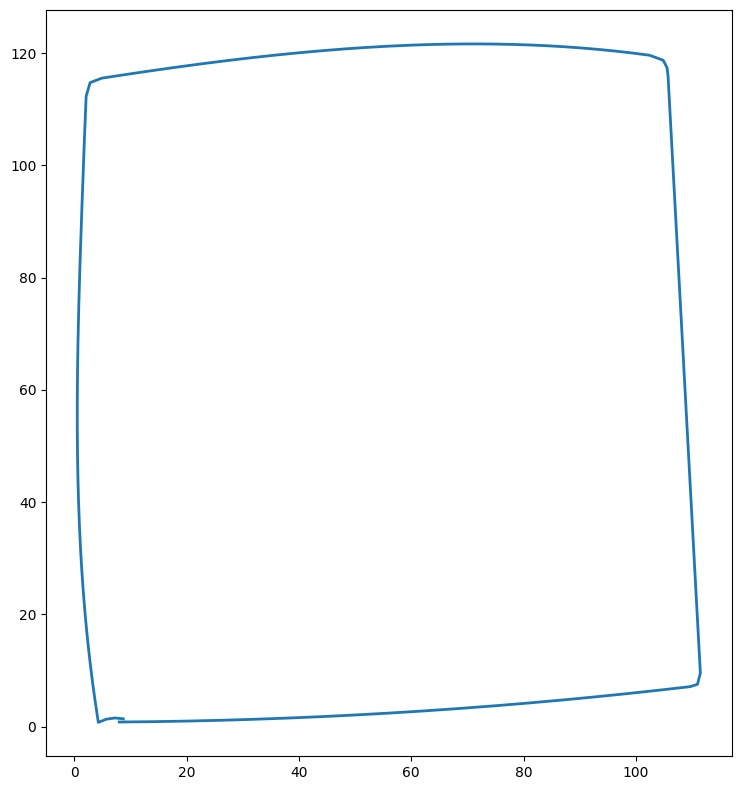

In [135]:
for i, (curve_set, path) in enumerate(closed_curves.items()):
    fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
    for el in curve_set:
        ax.plot (XY[el][:, 0], XY[el][:, 1], linewidth =2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()